<a href="https://colab.research.google.com/github/ShinHyun-soo/fbProphet/blob/main/ehtPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

     |████████████████████████████████| 112kB 5.6MB/s 


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ETH", interval="minute60")
df

,open,high,low,close,volume,value
2021-06-24 10:00:00,2249000.0,2270000.0,2221000.0,2226000.0,9299.150410,2.086342e+10
2021-06-24 11:00:00,2226000.0,2238000.0,2201000.0,2207000.0,7470.213001,1.654300e+10
2021-06-24 12:00:00,2207000.0,2249000.0,2204000.0,2225000.0,5973.231825,1.329860e+10
2021-06-24 13:00:00,2225000.0,2243000.0,2209000.0,2226000.0,5292.399874,1.179030e+10
2021-06-24 14:00:00,2227000.0,2252000.0,2223000.0,2249000.0,4506.446371,1.008378e+10
...,...,...,...,...,...,...
2021-07-02 15:00:00,2376000.0,2387000.0,2362000.0,2381000.0,4626.167478,1.097863e+10
2021-07-02 16:00:00,2383000.0,2427000.0,2374000.0,2416000.0,5674.527430,1.363751e+10
2021-07-02 17:00:00,2417000.0,2440000.0,2400000.0,2410000.0,5872.584398,1.419839e+10
2021-07-02 18:00:00,2410000.0,2410000.0,2381000.0,2394000.0,2933.998796,7.021210e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-06-24 10:00:00,2226000.0
1,2021-06-24 11:00:00,2207000.0
2,2021-06-24 12:00:00,2225000.0
3,2021-06-24 13:00:00,2226000.0
4,2021-06-24 14:00:00,2249000.0
...,...,...
195,2021-07-02 15:00:00,2381000.0
196,2021-07-02 16:00:00,2416000.0
197,2021-07-02 17:00:00,2410000.0
198,2021-07-02 18:00:00,2394000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

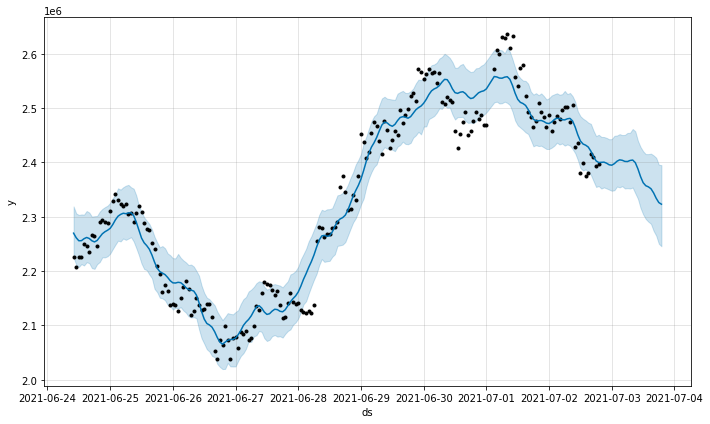

In [ ]:
#그래프1
fig1 = model.plot(forecast)

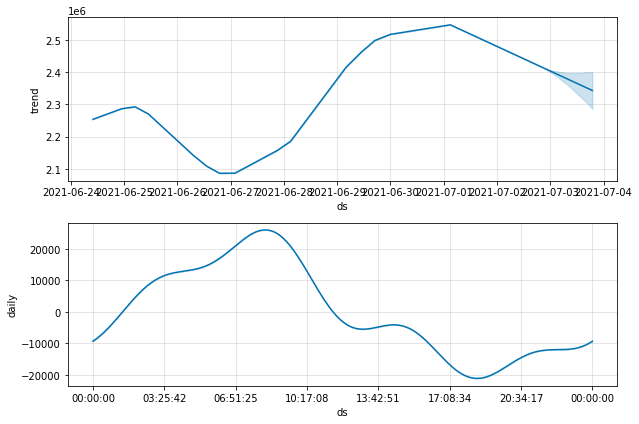

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

57098000.0

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

58097882.673339084

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  57098000.0
종가의 가격:  58097882.673339084


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-08 20:00:00,7.049319e+07,6.978264e+07,7.145666e+07,7.049319e+07,7.049319e+07,73763.938017,73763.938017,73763.938017,73763.938017,73763.938017,73763.938017,0.0,0.0,0.0,7.056695e+07
1,2021-05-08 21:00:00,7.054058e+07,6.981790e+07,7.151720e+07,7.054058e+07,7.054058e+07,155154.366642,155154.366642,155154.366642,155154.366642,155154.366642,155154.366642,0.0,0.0,0.0,7.069573e+07
2,2021-05-08 22:00:00,7.058797e+07,6.993552e+07,7.159752e+07,7.058797e+07,7.058797e+07,200297.460741,200297.460741,200297.460741,200297.460741,200297.460741,200297.460741,0.0,0.0,0.0,7.078827e+07
3,2021-05-08 23:00:00,7.063536e+07,6.995876e+07,7.160555e+07,7.063536e+07,7.063536e+07,127033.847973,127033.847973,127033.847973,127033.847973,127033.847973,127033.847973,0.0,0.0,0.0,7.076239e+07
4,2021-05-09 00:00:00,7.068275e+07,6.977696e+07,7.145736e+07,7.068275e+07,7.068275e+07,-64004.026527,-64004.026527,-64004.026527,-64004.026527,-64004.026527,-64004.026527,0.0,0.0,0.0,7.061875e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-05-17 23:00:00,5.741650e+07,5.620334e+07,5.893053e+07,5.640791e+07,5.859450e+07,127033.847977,127033.847977,127033.847977,127033.847977,127033.847977,127033.847977,0.0,0.0,0.0,5.754353e+07
220,2021-05-18 00:00:00,5.735429e+07,5.587900e+07,5.883842e+07,5.624516e+07,5.862328e+07,-64004.026533,-64004.026533,-64004.026533,-64004.026533,-64004.026533,-64004.026533,0.0,0.0,0.0,5.729029e+07
221,2021-05-18 01:00:00,5.729208e+07,5.553360e+07,5.871707e+07,5.610166e+07,5.864511e+07,-264151.046571,-264151.046571,-264151.046571,-264151.046571,-264151.046571,-264151.046571,0.0,0.0,0.0,5.702793e+07
222,2021-05-18 02:00:00,5.722988e+07,5.527597e+07,5.845177e+07,5.594232e+07,5.868056e+07,-331244.053737,-331244.053737,-331244.053737,-331244.053737,-331244.053737,-331244.053737,0.0,0.0,0.0,5.689863e+07
